<a href="https://colab.research.google.com/github/amutebe/alexmutebe.github.io/blob/main/MACHINE%20LEARNING/UNIT%206/K_Means_Clustering_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# chnage directory
%cd /content/drive/MyDrive/ESSEX/ML/UNIT 6/

/content/drive/MyDrive/ESSEX/ML/UNIT 6


Importing Iris data in CSV


In [6]:
df = pd.read_csv("Unit06 iris.csv")

EDA

In [ ]:
df.head()

In [15]:
# tabulation for species

species_counts = df['species'].value_counts()
print(species_counts)


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [ ]:
df.info()


In [17]:
# Check the percentages of missing value

df.isnull().sum() / df.shape[0] * 100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [21]:
#Descriptives for df

df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# prompt: perform  k means clustering

kmeans_model = KMeans(n_clusters=3, random_state=1)
kmeans_model.fit(df.drop('species', axis=1))


In [ ]:
wcss_values = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k)
    kmeans_model.fit(df.drop('species', axis=1))
    kmeans.fit(df.drop('species', axis=1))
    wcss_values.append(kmeans.inertia_)

Elbow curve

In [16]:
print(wcss_values)

[680.8244000000001, 152.36870647733906, 78.940841426146, 57.35501904761904]


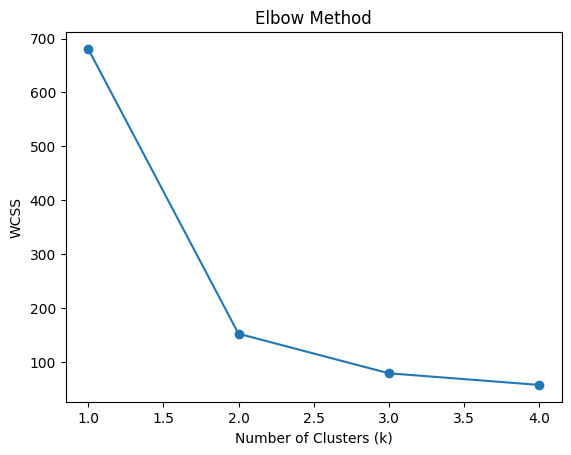

In [14]:
plt.plot(range(1, 5), wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

From the visualization, we can see that the optimal number of clusters should be around 3. This is where the graph starts to resemble an “elbow.”

In [21]:
# Upon clustering at K = 3, checking how much similar the three clusters are as compared to the labels of species – setosa, versicolour, and verginica.

import pandas as pd
# Creating a new column with cluster labels
df['cluster'] = kmeans_model.labels_

# Creating a crosstab to check the distribution of species in each cluster
pd.crosstab(df['cluster'], df['species'])


species,setosa,versicolor,virginica
cluster,,,
0,0,48,14
1,50,0,0
2,0,2,36


Observations:
With K=3
Setosa classification is at 100% accurate rate
Versicolor only 2 were misclassified 96% accuracy rate
Virginica has highest misclassification at 72% accuracy rate

This means that the clustering is very accurate for setosa and versicolor, but less accurate for virginica.

To quantify this, we can calculate the accuracy for each species:

- Setosa: 100% (50/50)
- Versicolor: 96% (48/50)
- Virginica: 72% (36/50)

Overall, the clustering is quite good, with an average accuracy of 89%.